<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/class(Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from scipy.stats.distributions import chi_gen

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

from sklearn.neural_network import MLPRegressor

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class numeric :
  def __init__(self):
    self.df = 0
    self.data_IQR2 = 0
    self.train_test_data = 0
    self.Y_value = 0
    self.Y_test = 0
  
  def read_file(self, file_address) :
    print("file read")
    self.df = pd.read_csv(file_address, encoding = "cp949")
  
  def normalization(self, column_number):
    print("normalization")
    self.df[self.df.columns[column_number]] = np.log1p(self.df[self.df.columns[column_number]])
    sns.distplot(self.df[self.df.columns[column_number]])

  def data_IQR(self, column_number) :
    print("-------------- Data_IQR ---------------")
    q1 = self.df[self.df.columns[column_number]].quantile(q=0.25)
    q3 = self.df[self.df.columns[column_number]].quantile(q=0.75)
    IQR = q3-q1
    self.data_IQR2 = self.df[(self.df[self.df.columns[column_number]] < q3 + IQR * 1.5) & 
                 (self.df[self.df.columns[column_number]] > q1 - IQR * 1.5)]
    sns.distplot(self.df[self.df.columns[column_number]])
    self.df = self.data_IQR2

  def before_making_model(self, X_list,Y_list,column_number):
    num = X_list
    cg = Y_list
    X = self.df[num+cg]
    Y = self.df[self.df.columns[column_number]]
    ct = ColumnTransformer([("scaling", StandardScaler(), num), ("onehot", OneHotEncoder(sparse = False), cg)])
    X_train, X_test, Y_train, self.Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    ct.fit(X_train)
    X_train = ct.transform(X_train)
    X_test = ct.transform(X_test)
    self.train_test_data = [X_train, X_test, Y_train, self.Y_test]
  
  def before_making_model2(self, X_list,Y_list,column_number,confirm):
    num = X_list
    cg = Y_list
    X = self.df[num+cg]
    Y = self.df[self.df.columns[column_number]]
    X_train, X_test, Y_train, self.Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    self.train_test_data = [X_train, X_test, Y_train, self.Y_test]

  def linearRegress(self, train_test_data,columns):
    print("----------LinearRegression value-----------")
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr = LinearRegression().fit(X_train, Y_train) 
    Y_pred = lr.predict(X_test)
    print("predict value\n",Y_pred)
    print("[linear]")
    print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
    print("test R2 : {:.3f}".format(lr.score(X_test, self.Y_test))) 
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred)) 
    print("RMSE : {:.3f}". format(rmse)) 
    print(columns)
    print("절편", np.round(lr.intercept_, 3))
    print("가중치(beta)", np.round(lr.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]

  def Reset_index(self, Y_test,column_number):
    self.Y_test = (pd.DataFrame(self.Y_test)).reset_index()
    self.Y_test = pd.DataFrame(self.Y_test[self.df.columns[column_number]])
  
  def plot_picture(self, Y_pred,Y_test):
    print("----------- plot grow----------- ")
    %matplotlib Inline
    plt.plot(Y_pred)
    plt.plot(self.Y_test)

  def Ridge_function(self,train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
    Y_pred = lr_ridge.predict(X_test)
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("[ridge]")
    print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
    print("RMSE : {:.3f}".format(rmse))
    print("절편", np.round(lr_ridge.intercept_, 3))
    print("가중치(beta)", np.round(lr_ridge.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]

  def Lasso_function(self, train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
    Y_pred = lr_lasso.predict(X_test)

    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("[lasso]")
    print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
    print("RMSE : {:.3f}".format(rmse))
    print("절편", np.round(lr_lasso.intercept_, 3))
    print("가중치(beta)", np.round(lr_lasso.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]

  def Elastic_function(self,train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
    Y_pred = lr_ela.predict(X_test)

    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("[elastic]")
    print("ela R2 : {:.3f}".format(lr_ela.score(X_train, Y_train)))
    print("RMSE : {:.3f}".format(rmse))
    print("절편", np.round(lr_ela.intercept_, 3))
    print("가중치(beta)", np.round(lr_ela.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]
  
  def knn_reg_function(self,train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    knn_reg = KNeighborsRegressor(n_neighbors=9, p =2)
    knn_reg.fit(X_train, Y_train)
    Y_pred = knn_reg.predict(X_test)
    print("[knn neighbors]")
    print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("RMSE: {:.3f}".format(rmse))
    self.Y_value = [Y_pred, self.Y_test]

  def decision_tree(self, train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    DT_model_reg = DecisionTreeRegressor(random_state = 0, max_depth = 5)
    DT_model_reg.fit(X_train, Y_train)
    Y_pred = DT_model_reg.predict(X_test)
    print("[decision_tree]")
    print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("rmse :  {:.3f}".format(rmse))
    self.Y_value = [Y_pred, self.Y_test]
    
    return[X_train, DT_model_reg]

  def SVR_function(self, train_test_data):
   X_train, X_test, Y_train, self.Y_test = self.train_test_data
   SVR_model = SVR(C=1, kernel = "linear", epsilon = 0.1)
   SVR_model.fit(X_train, Y_train)
   Y_pred = SVR_model.predict(X_test)
   print("[SVM : Support Vector Machine]")
   print("accuracy : {:.3f}".format(SVR_model.score(X_train, Y_train)))
   rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
   print("RMSE : {:.3f}".format(rmse))
   print(SVR_model.coef_)
   self.Y_value = [Y_pred, self.Y_test]

  def NaiveBayes(self, train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    NB_model_reg = BayesianRidge(alpha_1 = 0.001, lambda_1 = 0.001)
    NB_model_reg.fit(X_train, Y_train)
    Y_pred = NB_model_reg.predict(X_test)
    print("accuracy : {:.3f}".format(NB_model_reg.score(X_train, Y_train)))
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("rmse :  {:.3f}".format(rmse))
    print(NB_model_reg.coef_)
    self.Y_value = [Y_pred, self.Y_test]

  def MLP(self, train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    nn_reg_model = MLPRegressor(random_state = 0, alpha = 0.001, max_iter = 2000, 
                            hidden_layer_sizes = [50, 50])
    nn_reg_model.fit(X_train, Y_train)
    Y_pred = nn_reg_model.predict(X_test)
    print("Y predict value : \n", Y_pred)
    print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
    
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("RMSE : {:.3f}".format(rmse))
    self.Y_value = [Y_pred, self.Y_test]

  def DNN(self,train_test_data):
    np.random.seed(0)
    tf.random.set_seed(0)

    X_train, X_test, Y_train, self.Y_test = self.train_test_data

    X_train2 = pd.DataFrame(X_train)
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, input_dim=len(X_train2.columns), activation = "relu"))
    model.add(keras.layers.Dense(64, activation = "relu"))
    model.add(keras.layers.Dense(64, activation = "relu"))

    #6. 모형 학습
    model.compile(loss = "mse", optimizer = "SGD")
    Y_pred = np.round(model.predict(X_test[:5], verbose=0), 3)
    print("Y predict value \n", Y_pred)
    #7. 모형 평가
    train_score = model.evaluate(X_train, Y_train, verbose=0)
    test_score = model.evaluate(X_test, self.Y_test, verbose=0)
    print("train mse : {:.3f}".format(train_score))
    print("test mse : {:.3f}".format(test_score))
    self.Y_value = [Y_pred, self.Y_test]

  def RandomForest(self,train_test_data):

    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Y predict value : \n", Y_pred)
    print("accracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("RMSE :", rmse)
    self.Y_value = [Y_pred, self.Y_test]

 # def Gradien_function():
    


  
    


file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------
----------LinearRegression value-----------
predict value
 [2.71913822 2.62432822 2.613266   2.70548349 2.59341166 2.69499437
 2.69708915 2.62089431 2.66328822 2.61088496 2.70680497 2.67125581
 2.60031538 2.69372751 2.6733051  2.60392207 2.60516959 2.70160996
 2.66331215 2.69185393 2.58746476 2.68639797 2.70106348 2.60193194
 2.60849248 2.68776109 2.60149185 2.59820822 2.59634722 2.66160212
 2.66342275 2.60213028 2.67937124 2.68369064 2.68067752 2.70277363
 2.70142404 2.70728012 2.59243212 2.67324453 2.70261252 2.66758175
 2.68340784 2.66428835]
[linear]
train R2 : 0.124
test R2 : -0.009
RMSE : 0.125
Index(['ID', 'Year', 'Y', 'X1', 'X2', 'X3', 'X4'], dtype='object')
절편 2.659
가중치(beta) [ 0.008 -0.001 -0.    -0.002  0.037 -0.055  0.029  0.034  0.013 -0.063
  0.012  0.045 -0.051]
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


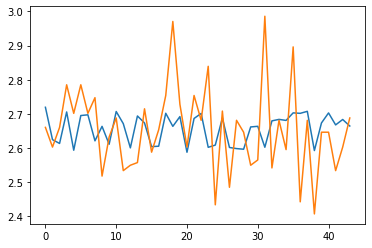

In [ ]:
x = numeric()
x.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x.normalization(2)
x.data_IQR(2)
x.before_making_model([x.df.columns[3],x.df.columns[4],x.df.columns[5], x.df.columns[6]],[x.df.columns[1]],2)

x.linearRegress(x.train_test_data, x.df.columns)
x.Reset_index(x.Y_value[1],2)
x.plot_picture(x.Y_value[0],x.Y_test)

file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------
[ridge]
ridge R2 : 0.123
RMSE : 0.125
절편 2.659
가중치(beta) [ 0.009 -0.001 -0.001 -0.002  0.033 -0.051  0.026  0.03   0.012 -0.057
  0.011  0.043 -0.046]
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


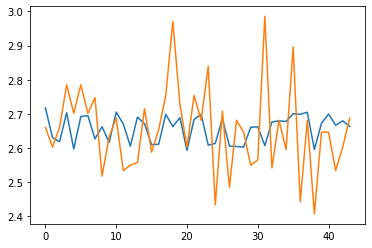

In [ ]:
x2 = numeric()
x2.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x2.normalization(2)
x2.data_IQR(2)
x2.before_making_model([x2.df.columns[3],x2.df.columns[4],x2.df.columns[5], x2.df.columns[6]],[x2.df.columns[1]],2)

x2.Ridge_function(x2.train_test_data)
x2.Reset_index(x2.Y_value[1],2)
x2.plot_picture(x2.Y_value[0],x2.Y_test)

file read
normalization
-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[lasso]
lasso R2 : 0.004
RMSE : 0.125
절편 2.661
가중치(beta) [ 0.003  0.    -0.    -0.     0.    -0.     0.     0.     0.    -0.
  0.     0.    -0.   ]
----------- plot grow----------- 


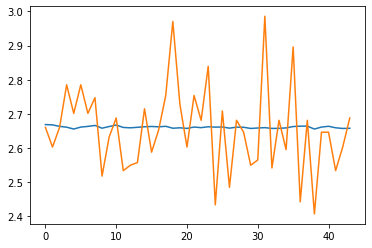

In [ ]:
x3 = numeric()
x3.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x3.normalization(2)
x3.data_IQR(2)
x3.before_making_model([x3.df.columns[3],x3.df.columns[4],x3.df.columns[5], x3.df.columns[6]],[x2.df.columns[1]],2)

x3.Lasso_function(x3.train_test_data)
x3.Reset_index(x3.Y_value[1],2)
x3.plot_picture(x3.Y_value[0],x3.Y_test)

file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------
[elastic]
ela R2 : 0.044
RMSE : 0.124
절편 2.664
가중치(beta) [ 0.007  0.    -0.    -0.     0.    -0.013  0.     0.     0.    -0.017
  0.     0.005 -0.01 ]
----------- plot grow----------- 


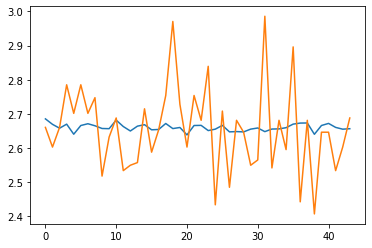

In [ ]:
x4 = numeric()
x4.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x4.normalization(2)
x4.data_IQR(2)
x4.before_making_model([x4.df.columns[3],x4.df.columns[4],x4.df.columns[5], x4.df.columns[6]],[x4.df.columns[1]],2)

x4.Elastic_function(x4.train_test_data)
x4.Reset_index(x4.Y_value[1],2)
x4.plot_picture(x4.Y_value[0],x4.Y_test)

file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------
[knn neighbors]
accuracy: 0.375
RMSE: 0.121
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


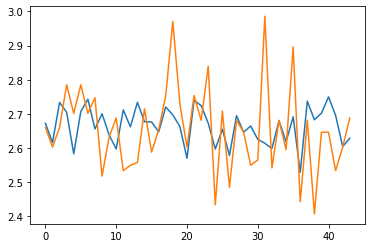

In [ ]:
x5 = numeric()
x5.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x5.normalization(2)
x5.data_IQR(2)
x5.before_making_model([x5.df.columns[3],x5.df.columns[4],x5.df.columns[5], x5.df.columns[6]],[x5.df.columns[1]],2)

x5.knn_reg_function(x5.train_test_data)
x5.Reset_index(x5.Y_value[1],2)
x5.plot_picture(x5.Y_value[0],x5.Y_test)

file read
normalization
-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[decision_tree]
accuracy : 0.757
rmse :  0.098
----------- plot grow----------- 


[(0.34804168754971004, 'X4'),
 (0.26644926961822857, 'X2'),
 (0.19512973465142128, 'X1'),
 (0.10979739532807471, 'X3'),
 (0.08058191285256548, 'Year')]

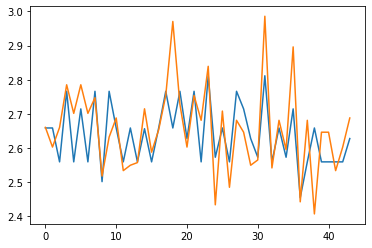

In [ ]:
x6 = numeric()
x6.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x6.normalization(2)
x6.data_IQR(2)
x6.before_making_model2([x6.df.columns[3],x6.df.columns[4],x6.df.columns[5], x6.df.columns[6]],[x6.df.columns[1]],2,1)
X_train, DT_model_reg = x6.decision_tree(x6.train_test_data)
x6.Reset_index(x6.Y_value[1],2)
x6.plot_picture(x6.Y_value[0],x6.Y_test)

feature_name = X_train.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance,feature_name), reverse = True)


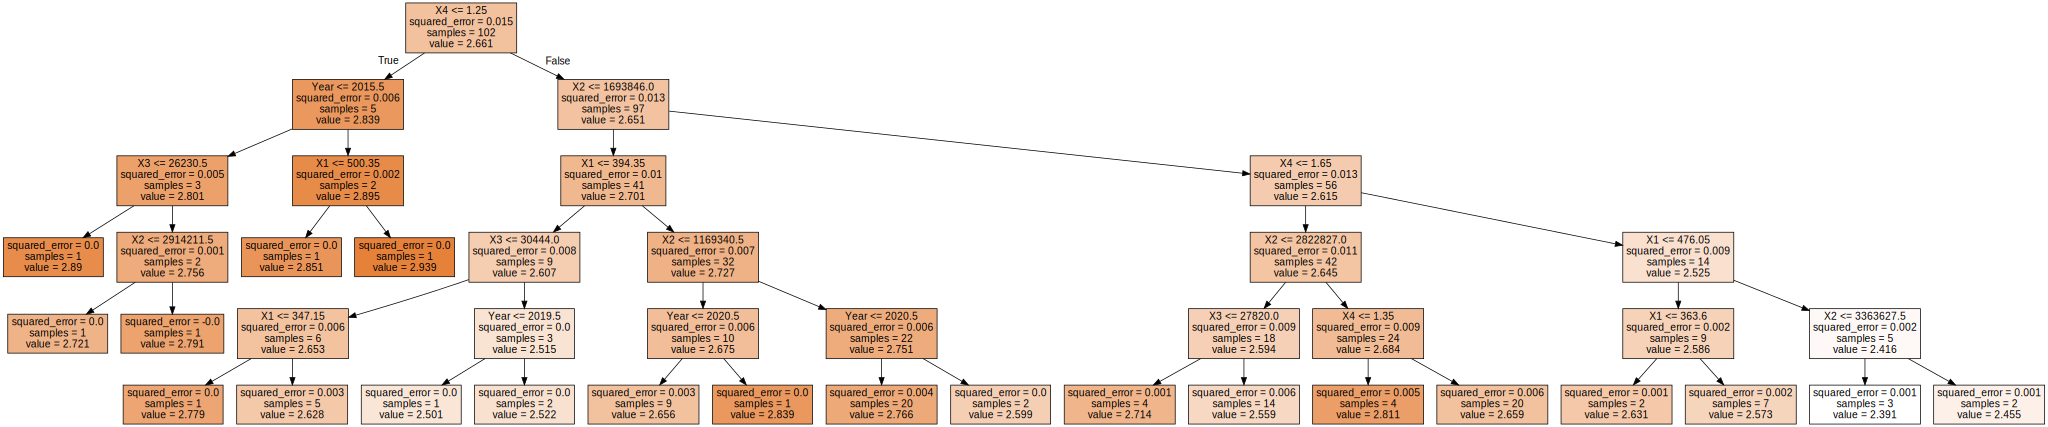

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file="tree.dot", class_names=["비이탈", "이탈"],
                feature_names = feature_name, impurity=True, filled = True)

#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[SVM : Support Vector Machine]
accuracy : 0.076
RMSE : 0.127
[[ 0.02118039 -0.0153622  -0.00026642  0.00213435  0.03908169 -0.05925868
   0.01576052  0.00491563  0.         -0.05960709  0.00253122  0.06174981
  -0.00517308]]
----------- plot grow----------- 


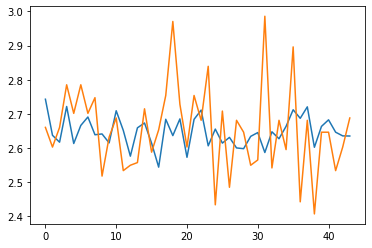

In [ ]:
x7 = numeric()
x7.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x7.normalization(2)
x7.data_IQR(2)
x7.before_making_model([x7.df.columns[3],x7.df.columns[4],x7.df.columns[5], x7.df.columns[6]],[x7.df.columns[1]],2)

x7.SVR_function(x7.train_test_data)
x7.Reset_index(x7.Y_value[1],2)
x7.plot_picture(x7.Y_value[0],x7.Y_test)

file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


accuracy : 0.004
rmse :  0.125
[ 9.64423837e-04  1.92405745e-04 -2.47424163e-04 -3.56521599e-04
  3.81885982e-04 -4.89408236e-04  2.35779445e-04  2.36922069e-04
  1.21990033e-04 -5.30099511e-04  7.79353652e-05  4.65508952e-04
 -5.00514099e-04]
----------- plot grow----------- 


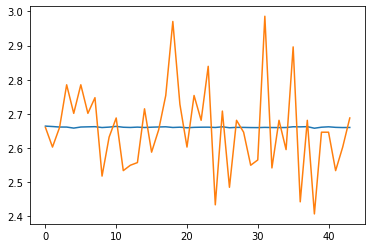

In [ ]:
x8 = numeric()
x8.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x8.normalization(2)
x8.data_IQR(2)
x8.before_making_model([x8.df.columns[3],x8.df.columns[4],x8.df.columns[5], x8.df.columns[6]],[x8.df.columns[1]],2)

x8.NaiveBayes(x8.train_test_data)
x8.Reset_index(x8.Y_value[1],2)
x8.plot_picture(x8.Y_value[0],x8.Y_test)

file read
normalization


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------
Y predict value : 
 [2.53297493 2.62192805 2.56254821 2.58328402 2.83816286 2.49323418
 2.672575   2.91370768 2.71935561 2.44371388 2.62272245 2.61302037
 2.84961609 2.69943821 2.56209708 2.5702123  2.61772184 2.68665154
 2.77731586 2.8966172  2.69965846 3.13901515 2.59426289 2.79543222
 1.94001252 2.60998917 2.60366861 2.56943355 2.5126153  2.93660623
 2.51528893 2.70635178 2.5563213  2.58555582 2.75084923 2.8051705
 2.39758119 2.40178374 2.88797299 2.5133886  2.93550614 2.73090102
 2.74663076 2.95097037]
train accuracy : -0.442
RMSE : 0.201
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


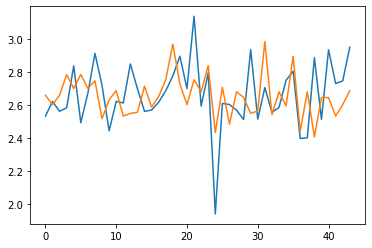

In [ ]:
x9 = numeric()
x9.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x9.normalization(2)
x9.data_IQR(2)
x9.before_making_model([x9.df.columns[3],x9.df.columns[4],x9.df.columns[5], x9.df.columns[6]],[x9.df.columns[1]],2)

x9.MLP(x9.train_test_data)
x9.Reset_index(x9.Y_value[1],2)
x9.plot_picture(x9.Y_value[0],x9.Y_test)

file read
normalization
-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Y predict value 
 [[0.02  0.133 0.    0.    0.    0.088 0.    0.    0.    0.    0.    0.004
  0.053 0.    0.    0.    0.    0.    0.153 0.    0.    0.037 0.    0.199
  0.    0.105 0.    0.239 0.004 0.238 0.    0.    0.    0.    0.    0.305
  0.    0.    0.    0.    0.114 0.062 0.039 0.528 0.054 0.219 0.    0.
  0.    0.693 0.    0.    0.198 0.    0.219 0.    0.158 0.195 0.11  0.
  0.087 0.028 0.11  0.   ]
 [0.206 0.156 0.    0.    0.192 0.    0.    0.142 0.    0.    0.005 0.
  0.    0.    0.105 0.    0.    0.    0.087 0.    0.    0.025 0.    0.365
  0.    0.031 0.069 0.169 0.    0.251 0.    0.    0.    0.02  0.    0.354
  0.    0.    0.    0.    0.111 0.    0.    0.391 0.    0.174 0.    0.
  0.021 0.578 0.    0.    0.033 0.    0.283 0.    0.118 0.2   0.134 0.034
  0.132 0.019 0.226 0.   ]
 [0.136 0.248 0.    0.006 0.318 0.    0.    0.328 0.    0.    0.014 0.072
  0.    0.    0.065 0.035 0.    0.    0.162 0.012 0.    0.    0.    0.229
  0.    0.    0.    0.077 0.    0.181 0.    0.    0.

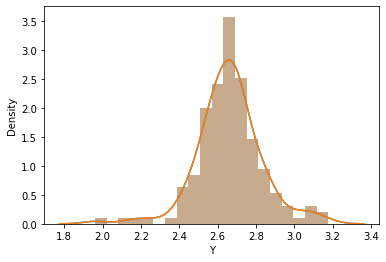

In [ ]:
x10 = numeric()
x10.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x10.normalization(2)
x10.data_IQR(2)
x10.before_making_model([x10.df.columns[3],x10.df.columns[4],x10.df.columns[5], x10.df.columns[6]],[x10.df.columns[1]],2)


x10.DNN(x10.train_test_data)
x10.Reset_index(x10.Y_value[1],2)
#x10.plot_picture(x10.Y_value[0],x10.Y_test)

file read
normalization
-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Y predict value : 
 [2.66212246 2.64815468 2.62549221 2.73927255 2.61099476 2.65551311
 2.61438711 2.71678679 2.61685803 2.70387016 2.64086674 2.63055257
 2.63584561 2.62698498 2.68801935 2.6179303  2.66428514 2.73285119
 2.66932347 2.68259417 2.61013031 2.76037343 2.64426713 2.71776718
 2.53919616 2.66933277 2.61133611 2.68118275 2.64643604 2.62175706
 2.59167625 2.70979586 2.60119358 2.65937342 2.5906911  2.64921231
 2.4659531  2.62232149 2.63297241 2.63530918 2.61784063 2.61429002
 2.59672614 2.63768263]
accracy(R2) : 0.703
RMSE : 0.09879175861535613
----------- plot grow----------- 


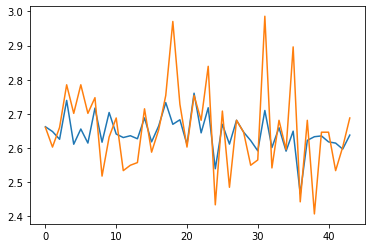

In [ ]:
x11 = numeric()
x11.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x11.normalization(2)
x11.data_IQR(2)
x11.before_making_model([x11.df.columns[3],x11.df.columns[4],x11.df.columns[5], x11.df.columns[6]],[x11.df.columns[1]],2)

x11.RandomForest(x11.train_test_data)
x11.Reset_index(x11.Y_value[1],2)
x11.plot_picture(x11.Y_value[0],x11.Y_test)